In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import os
from matplotlib.cm import get_cmap
import numpy as np

In [2]:
# read Data Lorenzo
drive.mount("/content/drive")
os.chdir("drive/My Drive/data")
df = pd.read_csv('ble_data.csv')
df.head(2)

Mounted at /content/drive


,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,battery_state_real_time_current,battery_state_remaining_capacity,dance_area,event,hmi_serial_number,os_name,remaining_mileage,versions_battery_firmware,versions_hmi_firmware,versions_hmi_hardware
0,bc3412f7-37a8-4676-8043-53f4a1bb316a,ca73adbe-5930-45ba-af74-de5865d8b093,7281.0,DA210815.10,2023-04-05 08:54:50,2023.03.24-3923-prod-release,0.0,"[null,null,null,null,null,null,null,null,null,...",0.0,HT1002MA121521183,...,-60.0,0.0,PARIS,Vehicle Connected,60968A,Android,1300.0,0.3.3.0,1.7.18.0,1.0
1,95e7ee01-3987-481a-9000-3b331c52192f,6560e385-b90d-42be-b977-5cdb3a5d5a60,NaN,NaN,2022-09-05 18:13:47,2022.8.26,NaN,NaN,0.0,NaN,...,NaN,NaN,PARIS,Vehicle Connected,NaN,iOS,NaN,NaN,NaN,NaN


In [3]:
# Read data Vera
# Mount data from drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/My Drive/ishango/dance/data/ble_data.csv")
# df.head(n=5)

In [4]:
df.columns

Index(['vehicle_id', 'user_id', 'total_mileage', 'versions_mc_firmware',
       'occurred_at_time', 'app_version', 'assist_level', 'battery_cells',
       'battery_error_state', 'battery_serial_number',
       'battery_state_battery_soc', 'battery_state_battery_soh',
       'battery_state_cell_temp_1', 'battery_state_cell_temp_2',
       'battery_state_chg_temp', 'battery_state_dsg_temp',
       'battery_state_full_capacity', 'battery_state_pack_voltage',
       'battery_state_pre_start_temp', 'battery_state_real_time_current',
       'battery_state_remaining_capacity', 'dance_area', 'event',
       'hmi_serial_number', 'os_name', 'remaining_mileage',
       'versions_battery_firmware', 'versions_hmi_firmware',
       'versions_hmi_hardware'],
      dtype='object')

In [5]:
(df.shape, df['vehicle_id'].nunique(), df['battery_serial_number'].nunique())

((3215664, 29), 7309, 76427)

In [6]:
## data cleaning general

# remove duplicates
df = df.drop_duplicates()

# drop NAs in mileage
df = df.dropna(subset=['total_mileage'])

# sort based on time
df = df.sort_values(by='occurred_at_time')

# adjust datatype
df['occurred_at_time'] = pd.to_datetime(df['occurred_at_time'])

In [7]:
(df.shape, df['vehicle_id'].nunique(), df['battery_serial_number'].nunique())

((2687807, 29), 7308, 76421)

In [8]:
#some examples
# take a sample of bikes
vehicles = ['382d4727-6119-4391-adc0-ac5500c489b6',
            'bc3412f7-37a8-4676-8043-53f4a1bb316a',
            'ca4c5d0d-0d08-4189-b8ee-e8cd4d337422',
            '4cf2b02f-5631-4441-a93d-a1f2d59c83bf',
            '00e10c80-c79a-4e5e-b5ee-73de58bb7091',
            '010df9b5-ecea-445a-9cc5-01fa71edcce3',
            '00c8acbf-39fe-44dc-bdc5-257e189c4a58'
            ]

df_sample = df[df['vehicle_id'].isin(vehicles)]

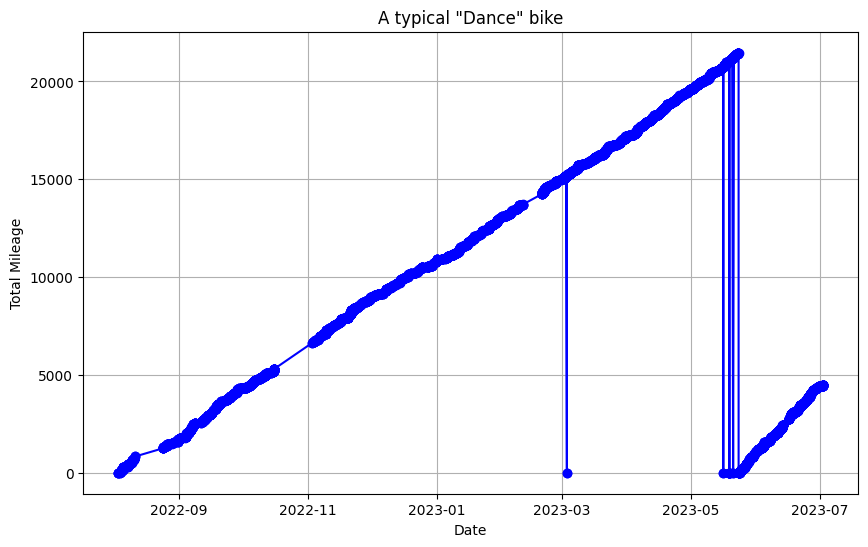

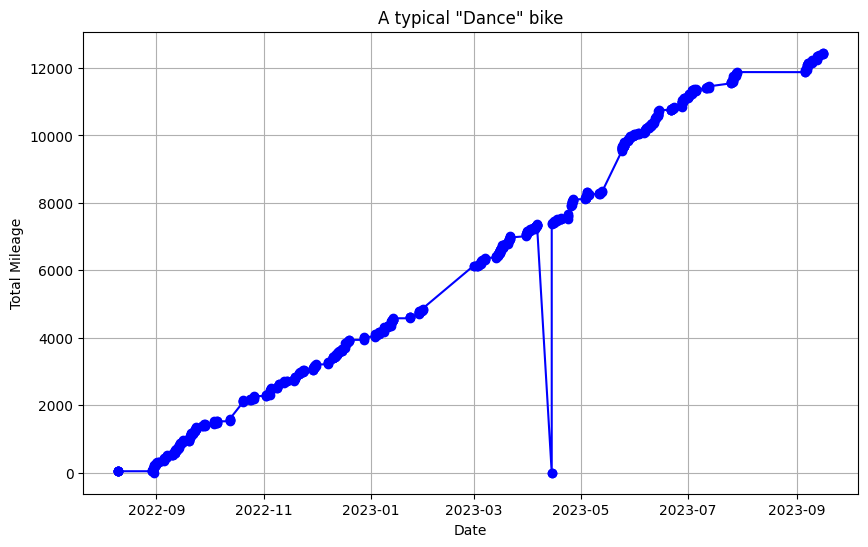

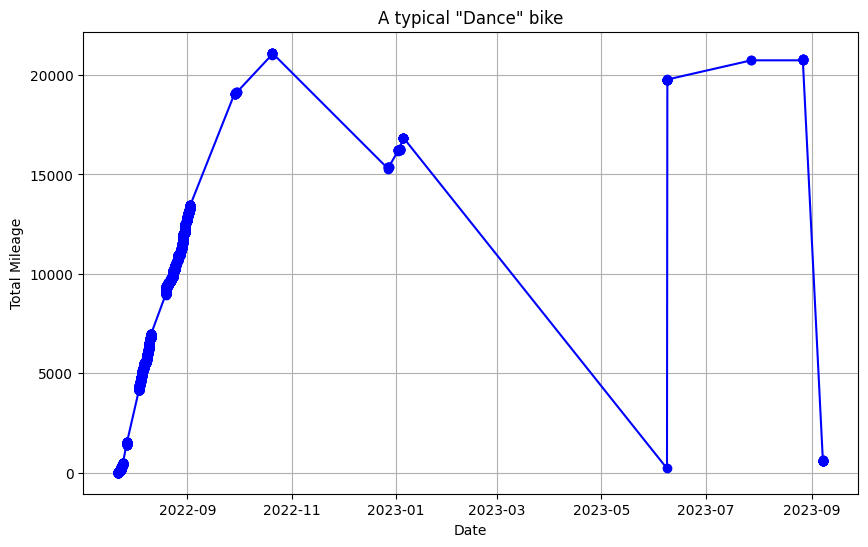

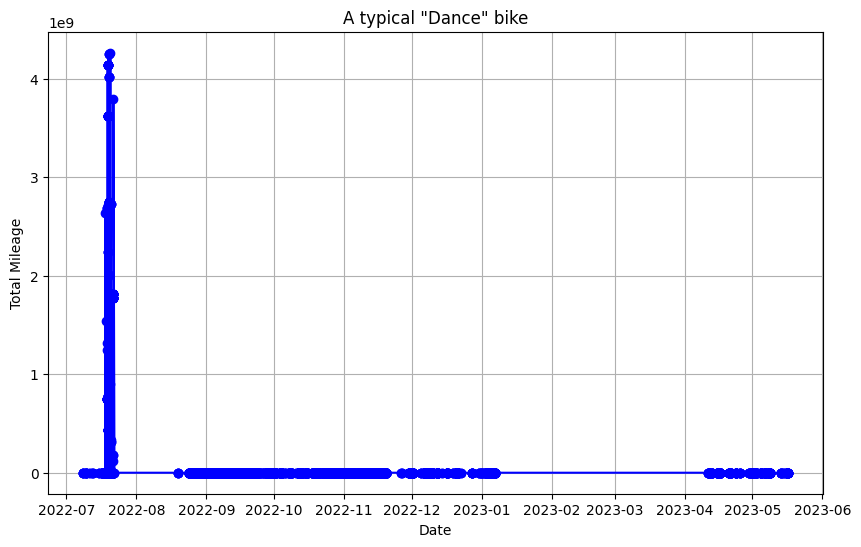

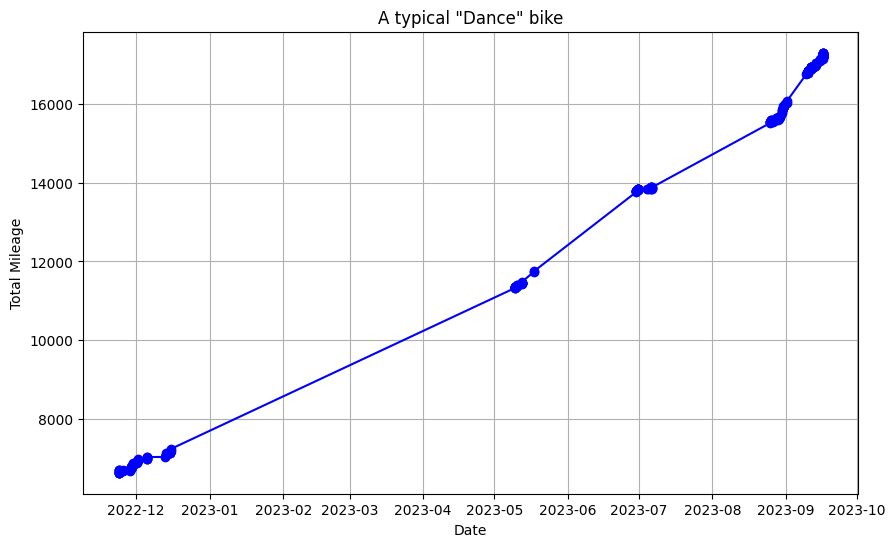

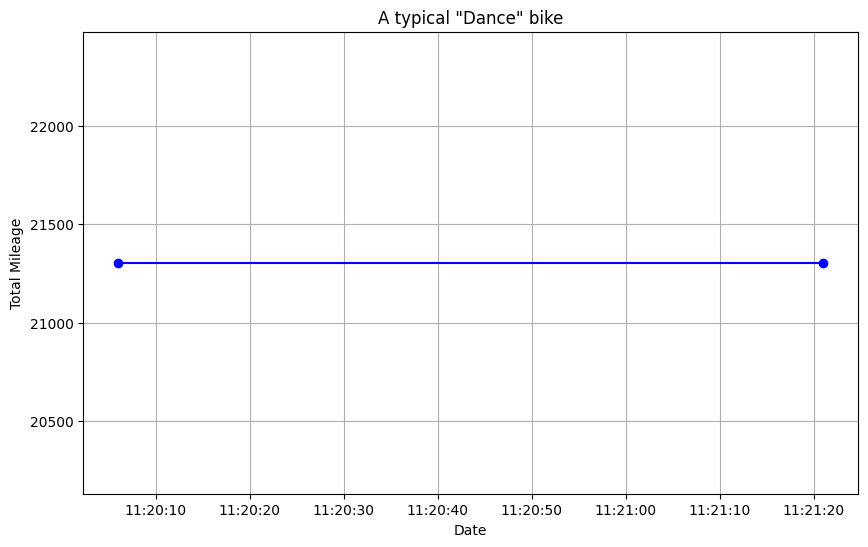

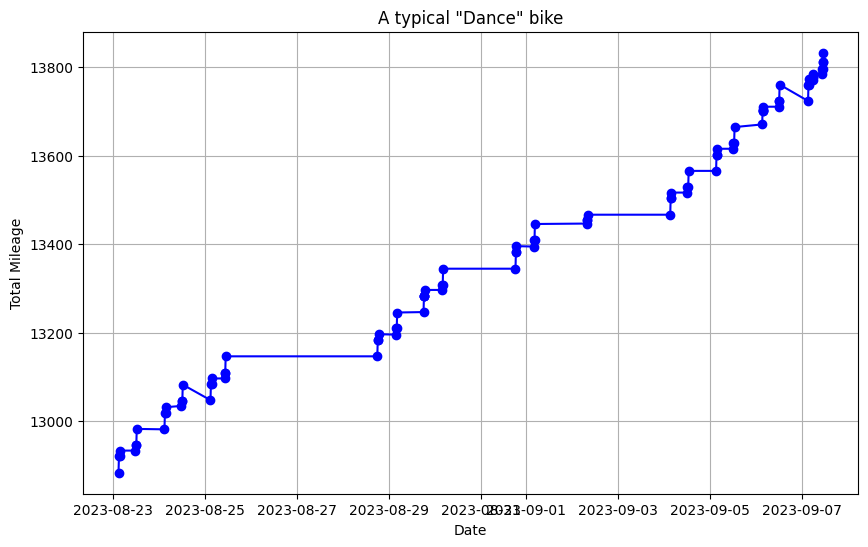

In [9]:
for vehicle in vehicles:
  df_interim = df_sample[df_sample['vehicle_id'] == vehicle]

  # plot mileage vs time:a
  df_interim.set_index('occurred_at_time', inplace=True)
  plt.figure(figsize=(10, 6))
  plt.plot(df_interim.index, df_interim['total_mileage'], marker='o', linestyle='-', color='b')
  plt.title('A typical "Dance" bike')
  plt.xlabel('Date')
  plt.ylabel('Total Mileage')
  plt.grid(True)
  plt.show()

In [10]:
# at least 50 observations per vehicle
df['ValueCount'] = df.groupby('vehicle_id')['occurred_at_time'].transform('count')
df1 = df[df['ValueCount']>50]
df1.head(2)

,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,battery_state_remaining_capacity,dance_area,event,hmi_serial_number,os_name,remaining_mileage,versions_battery_firmware,versions_hmi_firmware,versions_hmi_hardware,ValueCount
1008658,2d29f23f-684a-4ef9-9460-bf038a47c3cc,c76a9b98-38ee-48d8-999e-490bed0a8e87,9004.0,DA210815.10,2022-06-21 06:25:06,2022.06.20-2656-prod-release,1.0,NaN,NaN,HT1002MA121220310,...,NaN,BERLIN,Vehicle Connected,NaN,Android,336.0,0.2.1.0,1.7.18.0,1.0,1232
2802599,2d29f23f-684a-4ef9-9460-bf038a47c3cc,c76a9b98-38ee-48d8-999e-490bed0a8e87,9018.0,DA210815.10,2022-06-21 06:31:01,2022.06.20-2656-prod-release,0.0,NaN,NaN,HT1002MA121220310,...,NaN,BERLIN,Vehicle Disconnected,NaN,Android,780.0,0.2.1.0,1.7.18.0,1.0,1232


In [11]:
# at least 2 months of data per bike
result = df1.groupby('vehicle_id')['occurred_at_time'].agg(lambda x: (x.max() - x.min()).days).reset_index()
result.rename(columns={'occurred_at_time': 'DateDifference'}, inplace=True)

# Merge the result back into the original DataFrame
df2 = df1.merge(result, on='vehicle_id')
df2 = df2[df2['DateDifference']>60]
df2.head(2)

,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,dance_area,event,hmi_serial_number,os_name,remaining_mileage,versions_battery_firmware,versions_hmi_firmware,versions_hmi_hardware,ValueCount,DateDifference
0,2d29f23f-684a-4ef9-9460-bf038a47c3cc,c76a9b98-38ee-48d8-999e-490bed0a8e87,9004.0,DA210815.10,2022-06-21 06:25:06,2022.06.20-2656-prod-release,1.0,NaN,NaN,HT1002MA121220310,...,BERLIN,Vehicle Connected,NaN,Android,336.0,0.2.1.0,1.7.18.0,1.0,1232,455
1,2d29f23f-684a-4ef9-9460-bf038a47c3cc,c76a9b98-38ee-48d8-999e-490bed0a8e87,9018.0,DA210815.10,2022-06-21 06:31:01,2022.06.20-2656-prod-release,0.0,NaN,NaN,HT1002MA121220310,...,BERLIN,Vehicle Disconnected,NaN,Android,780.0,0.2.1.0,1.7.18.0,1.0,1232,455


In [12]:
## clean battery serial number -> valid numbers are 17 characters starting with 'HT' (e.g HT1002MA121220310)

print("Number of null values in battery before cleaning:", df2['battery_serial_number'].isnull().sum())

# substring 17 characters
df2['battery_serial_number_clean'] = df2['battery_serial_number'].str[:17].astype(str)

# keep rows starting with 'HT' otherwise set to none and length 17
df2['battery_serial_number_clean'] = df2['battery_serial_number_clean'].apply(lambda x: x if ((x.startswith('HT')) & (len(x)== 17)) else None)

# remove rows where we only have 5 battery records per vehicle (seem to be wrong recordings)
df2['combination_count'] = df2.groupby(['vehicle_id', 'battery_serial_number_clean'])['vehicle_id'].transform('size')

mask = (df2['combination_count'].isnull()) | (df2['combination_count'] > 5)
df2 = df2[mask]


Number of null values in battery before cleaning: 284326


In [13]:
# fill empty battery numbers with closest none null for each bike
# example = df[df['vehicle_id'] == '598c35a4-0510-4178-a973-d568f51f8085'] #'00214cc8-4fc8-4dab-b5a8-4b9063f145ec']
# print('Batteries before filling: \n\n', example['battery_serial_number_clean'].value_counts(dropna=False))

# example['Battery_Count'] = example.groupby('vehicle_id')['battery_serial_number_clean'].transform('count')
# print('Batteries before filling: \n\n', example['Battery_Count'].value_counts(dropna=False))

# # Example many batteries but probably wrong: '018da913-cb68-4868-bd57-72fb3ecb756b'

# # Sort the DataFrame by 'Bike' and 'Timestamp'
df2 = df2.sort_values(['vehicle_id', 'occurred_at_time'])
df2['battery_filled'] = df2['battery_serial_number_clean']

def interpolate_string(group):
    group['battery_filled'].fillna(method='ffill', inplace=True)
    group['battery_filled'].fillna(method='bfill', inplace=True)
    return group

# Apply the custom interpolation function to each group
df2 = df2.groupby('vehicle_id', group_keys=False).apply(interpolate_string).reset_index(drop=True)

print('Batteries after filling: \n\n', df2['battery_filled'].value_counts(dropna=False))

Batteries after filling: 

 None                 216361
HT1002MA122350661     11172
HT1002MA122080637      9169
HT1002MA121520110      8992
HT1002MA121402126      8075
                      ...  
HT1002MA32331HT10         6
HT1002MA121401510         6
HT1002MA121521239         6
HT1002MA121521210         6
HT1002MA121251643         6
Name: battery_filled, Length: 5191, dtype: int64


In [14]:
# at least 50 observations per vehicle
df['ValueCount'] = df.groupby('vehicle_id')['occurred_at_time'].transform('count')
df1 = df[df['ValueCount']>50]
df1.head(2)

,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,battery_state_remaining_capacity,dance_area,event,hmi_serial_number,os_name,remaining_mileage,versions_battery_firmware,versions_hmi_firmware,versions_hmi_hardware,ValueCount
1008658,2d29f23f-684a-4ef9-9460-bf038a47c3cc,c76a9b98-38ee-48d8-999e-490bed0a8e87,9004.0,DA210815.10,2022-06-21 06:25:06,2022.06.20-2656-prod-release,1.0,NaN,NaN,HT1002MA121220310,...,NaN,BERLIN,Vehicle Connected,NaN,Android,336.0,0.2.1.0,1.7.18.0,1.0,1232
2802599,2d29f23f-684a-4ef9-9460-bf038a47c3cc,c76a9b98-38ee-48d8-999e-490bed0a8e87,9018.0,DA210815.10,2022-06-21 06:31:01,2022.06.20-2656-prod-release,0.0,NaN,NaN,HT1002MA121220310,...,NaN,BERLIN,Vehicle Disconnected,NaN,Android,780.0,0.2.1.0,1.7.18.0,1.0,1232


In [15]:
# at least 2 months of data per bike
result = df1.groupby('vehicle_id')['occurred_at_time'].agg(lambda x: (x.max() - x.min()).days).reset_index()
result.rename(columns={'occurred_at_time': 'DateDifference'}, inplace=True)

# Merge the result back into the original DataFrame
df2 = df1.merge(result, on='vehicle_id')
df2 = df2[df2['DateDifference']>60]
df2.head(2)

,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,dance_area,event,hmi_serial_number,os_name,remaining_mileage,versions_battery_firmware,versions_hmi_firmware,versions_hmi_hardware,ValueCount,DateDifference
0,2d29f23f-684a-4ef9-9460-bf038a47c3cc,c76a9b98-38ee-48d8-999e-490bed0a8e87,9004.0,DA210815.10,2022-06-21 06:25:06,2022.06.20-2656-prod-release,1.0,NaN,NaN,HT1002MA121220310,...,BERLIN,Vehicle Connected,NaN,Android,336.0,0.2.1.0,1.7.18.0,1.0,1232,455
1,2d29f23f-684a-4ef9-9460-bf038a47c3cc,c76a9b98-38ee-48d8-999e-490bed0a8e87,9018.0,DA210815.10,2022-06-21 06:31:01,2022.06.20-2656-prod-release,0.0,NaN,NaN,HT1002MA121220310,...,BERLIN,Vehicle Disconnected,NaN,Android,780.0,0.2.1.0,1.7.18.0,1.0,1232,455


In [16]:
df3['total_mileage'].sort_values(ascending=False)

NameError: ignored

In [ ]:
# eliminate outliers drop
## looks like no bike log mileage > 21500
df3 = df2[(df2['total_mileage']>500) & (df2['total_mileage']<21500)]

In [ ]:
df3.head(1)

In [ ]:
df3.columns

In [ ]:
df3[df3['dance_area'].isin(['UNALLOCATED','ASSEMBLY'])]['dance_area']

728246     UNALLOCATED
728247     UNALLOCATED
728248     UNALLOCATED
728249     UNALLOCATED
728250     UNALLOCATED
              ...     
1760741    UNALLOCATED
1760742    UNALLOCATED
1760743    UNALLOCATED
1760744    UNALLOCATED
1760745    UNALLOCATED
Name: dance_area, Length: 1623, dtype: object

In [ ]:
#population after some basic cleaning
df3.groupby('dance_area')[['vehicle_id', 'user_id', 'battery_filled']].nunique().reset_index().sort_values(by='vehicle_id', ascending=False)

In [ ]:
(df3['battery_serial_number'].nunique(), len(df3['battery_serial_number']), df3['battery_serial_number'].isna().sum())
# 10% missing values

In [ ]:
## clean battery serial number -> valid numbers are 17 characters starting with 'HT' (e.g HT1002MA121220310)
# substring 17 characters
df3['battery_serial_number_clean'] = df3['battery_serial_number'].str[:17].astype(str)

# keep rows starting with 'HT' otherwise set to none
df3['battery_serial_number_clean'] = df3['battery_serial_number_clean'].apply(lambda x: x if ((x.startswith('HT')) & (len(x)==17)) else None)
(df3['battery_serial_number_clean'].nunique(), len(df3['battery_serial_number_clean']), df3['battery_serial_number_clean'].isna().sum())

In [ ]:
# Customize the histogram
n_bins = 100
plt.hist(df3['total_mileage'], bins=n_bins, edgecolor='k')



plt.title('Mileage histogram')
plt.xlabel('total_mileage')
plt.ylabel('Frequency')
plt.show()

In [ ]:
for vehicle in vehicles:
  df_interim = df3[df2['vehicle_id'] == vehicle]

  # plot mileage vs time:a
  df_interim.set_index('occurred_at_time', inplace=True)
  plt.figure(figsize=(10, 6))
  plt.plot(df_interim.index, df_interim['total_mileage'], marker='o', linestyle='-', color='b')
  plt.title('Time Series Plot')
  plt.xlabel('Date')
  plt.ylabel('Total Mileage')
  plt.grid(True)
  plt.show()

In [ ]:
# Sample DataFrame
df_test = df3[df3['vehicle_id'] == '382d4727-6119-4391-adc0-ac5500c489b6']


# Create a figure and two subplots sharing the same x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Get unique values in the 'group_type' column
unique_group_types = df_test['battery_serial_number'].unique()

# Generate a color map based on the number of unique values
cmap = get_cmap('tab20', len(unique_group_types))

# Generate a color map based on the number of unique values
cmap = get_cmap('tab20', len(unique_group_types))

# Create a color mapping dictionary
color_map = {group_type: cmap(i) for i, group_type in enumerate(unique_group_types)}

for group_type, group_df in df_test.groupby('battery_serial_number'):
    ax1.plot(group_df['occurred_at_time'], group_df['total_mileage'], color=color_map[group_type], label=f'Distance - {group_type}')


ax1.set_xlabel('occurred_at_time')
ax1.set_ylabel('total_mileage')
ax1.tick_params(axis='y')

# Create a twin y-axis on the right side
ax2 = ax1.twinx()

# # Plot the 'money' data on the right y-axis (ax2) with color mapping
# for group_type, group_df in df.groupby('group_type'):
#     ax2.plot(group_df['date'], group_df['money'], color=color_map[group_type], label=f'Money - {group_type}')

# ax2.set_ylabel('Money')
# ax2.tick_params(axis='y')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines , labels, loc='upper left')

# Show the plot
plt.title('Time Series with Dual Y-Axis and Group Color Coding')
plt.show()

In [ ]:
# average number of battery per bike
average_unique_labels = df3.groupby('vehicle_id')['battery_serial_number_clean'].nunique().mean()
average_unique_labels

In [ ]:
dff_battery = df3.groupby('vehicle_id')['battery_serial_number_clean'].nunique()
dff_battery

In [ ]:
n_bins = 200
plt.hist(dff_battery, bins=n_bins, edgecolor='k')

plt.title('battery histogram')
plt.xlabel('battery')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#df3['approximate_month'] = df3['occurred_at_time'].dt.to_period('M')
df3_temp = df3[df3['total_mileage']>20000][['battery_serial_number_clean', 'occurred_at_time']].drop_duplicates()

result3 = df3_temp.groupby('battery_serial_number_clean')['occurred_at_time'].agg(lambda x: (x.max() - x.min()).days).reset_index()
result3.rename(columns={'occurred_at_time': 'DateDifference'}, inplace=True)

result3.head()
# # Merge the result back into the original DataFrame
# df_all = df3_temp.merge(result3, on='vehicle_id')
# #df2 = df2[df2['DateDifference']>60]
# df_all.head(2)

In [ ]:
result3.sort_values(by='DateDifference', ascending=False).head(30)


In [ ]:
vehicles2 = list(result3.sort_values(by='DateDifference', ascending=False).head(50)['battery_serial_number_clean'])
vehicles2

In [ ]:
for vehicle in vehicles2:
  df_interim = df3[df3['battery_serial_number_clean'] == vehicle]

  # plot mileage vs time:a
  df_interim.set_index('occurred_at_time', inplace=True)
  plt.figure(figsize=(10, 6))
  plt.plot(df_interim.index, df_interim['total_mileage'], marker='o', linestyle='-', color='b')
  plt.title('Time Series Plot')
  plt.xlabel('Date')
  plt.ylabel('Total Mileage')
  plt.grid(True)
  plt.show()


In [ ]:
average_unique_users = df3.groupby('vehicle_id')['user_id'].nunique().mean()
average_unique_users

In [ ]:
df3.columns

## 1 BATTERY 1 BIKE

In [ ]:
df3.head(2)

In [ ]:
df3['count_unique_battery'] = df3.groupby('vehicle_id')['battery_serial_number_clean'].transform('nunique')
df3['count_unique_bike'] = df3.groupby('battery_serial_number_clean')['vehicle_id'].transform('nunique')

df3.head(2)

In [ ]:
set(df3[df3['vehicle_id']=='2d29f23f-684a-4ef9-9460-bf038a47c3cc']['battery_serial_number_clean'])

In [ ]:
#
df_unique = df3[(df3['count_unique_bike']==1) & (df3['count_unique_battery']==1)]
(df_unique.shape, df3.shape)

In [17]:
v_unique = list(set(df_unique['battery_serial_number_clean'].head(1000)))
v_unique

NameError: ignored

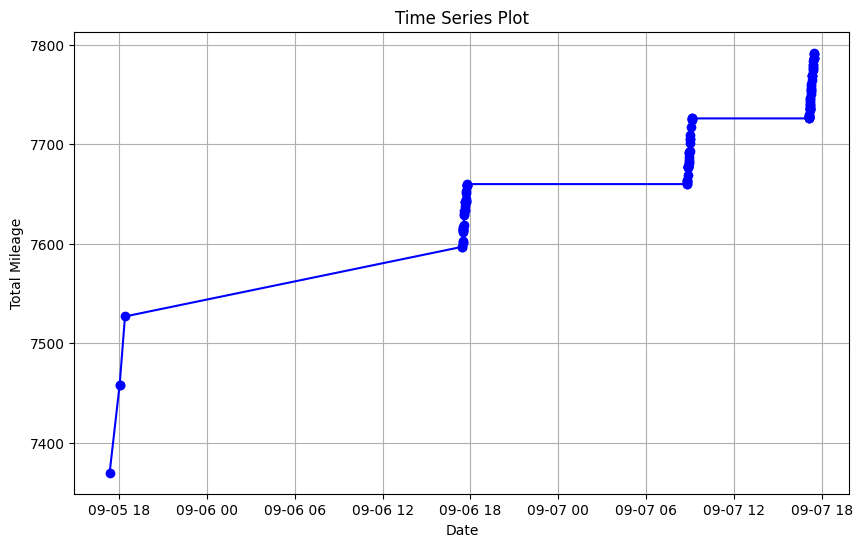

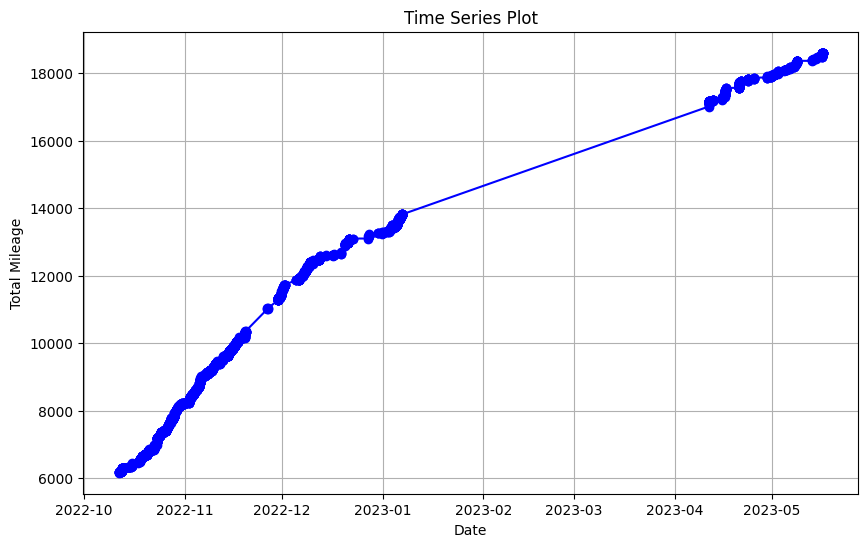

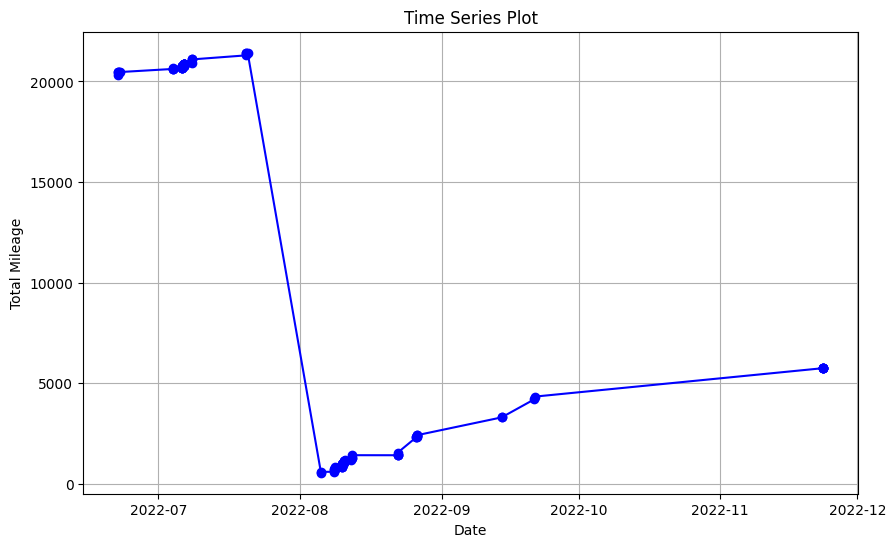

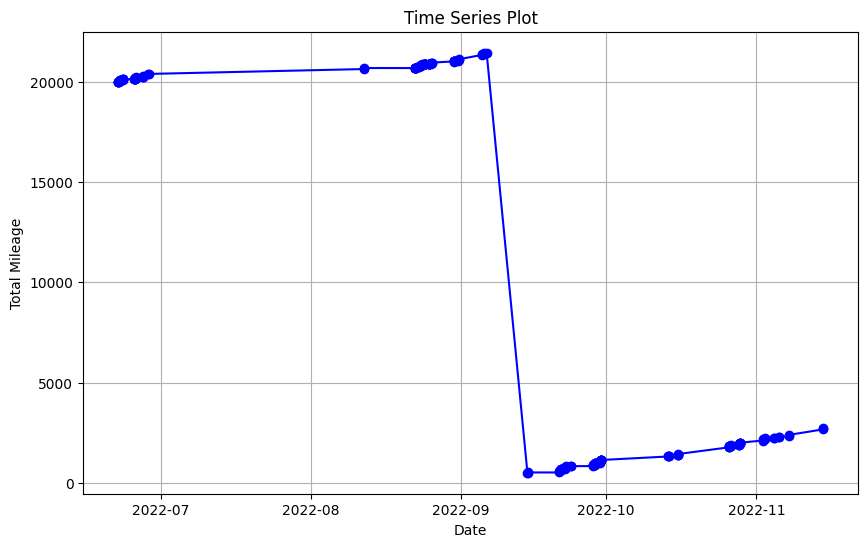

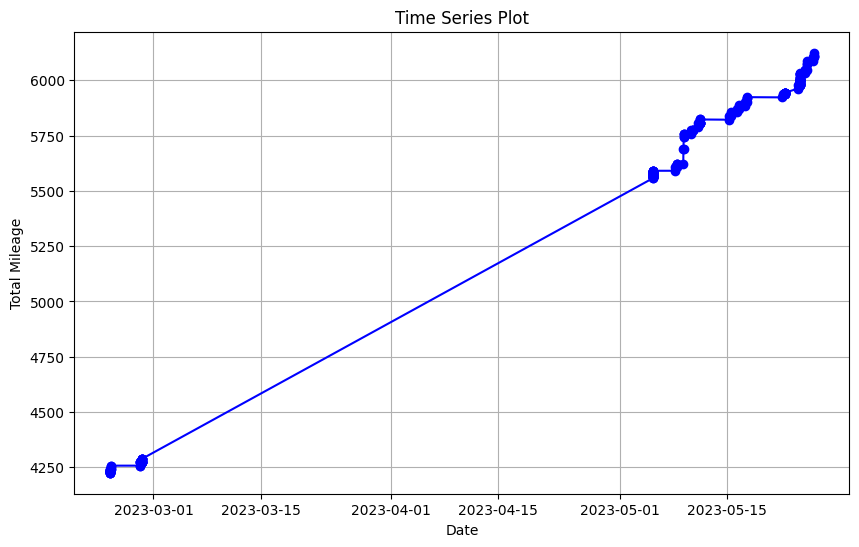

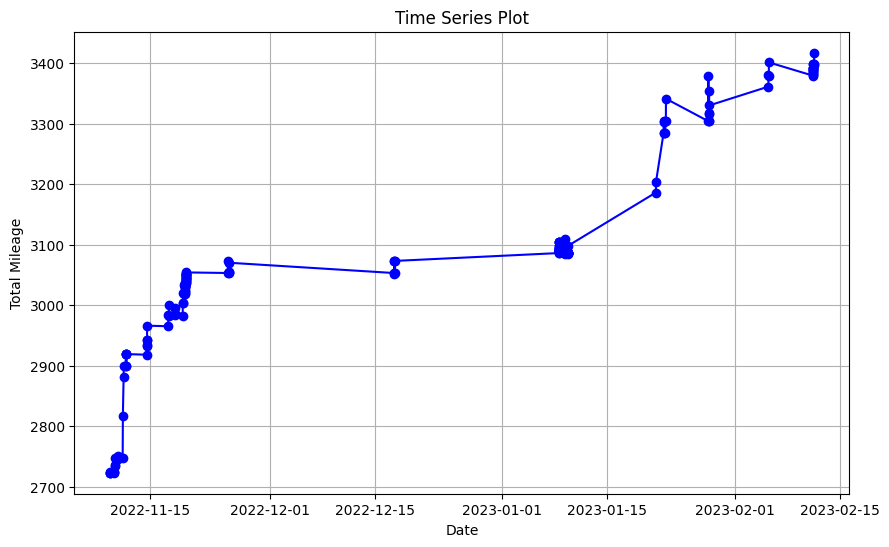

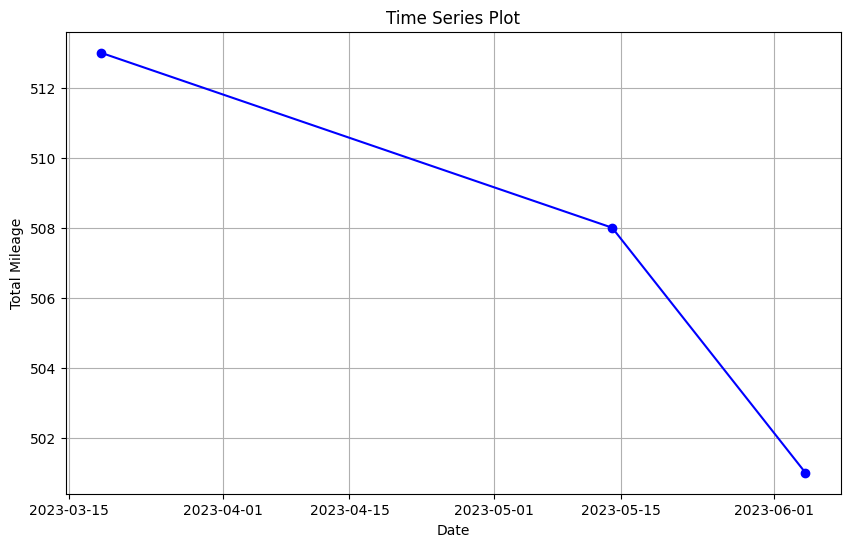

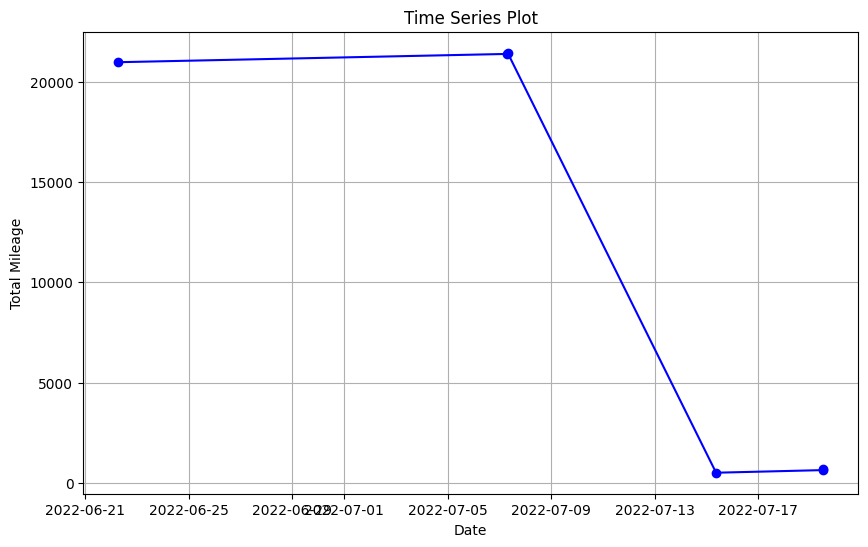

In [ ]:
for vehicle in v_unique:
  df_interim = df_unique[df_unique['battery_serial_number_clean'] == vehicle]

  # plot mileage vs time:a
  df_interim.set_index('occurred_at_time', inplace=True)
  plt.figure(figsize=(10, 6))
  plt.plot(df_interim.index, df_interim['total_mileage'], marker='o', linestyle='-', color='b')
  plt.title('Time Series Plot')
  plt.xlabel('Date')
  plt.ylabel('Total Mileage')
  plt.grid(True)
  plt.show()

In [ ]:
## eliminate double resets

df_unique_doble = df_unique[df_unique['total_mileage']>20000][['battery_serial_number_clean', 'occurred_at_time']].drop_duplicates()

result_u = df_unique_doble.groupby('battery_serial_number_clean')['occurred_at_time'].agg(lambda x: (x.max() - x.min()).days).reset_index()
result_u.rename(columns={'occurred_at_time': 'DateDifference'}, inplace=True)

result_u.head()


,battery_serial_number_clean,DateDifference
0,HT1002MA121220258,15
1,HT1002MA121220357,26
2,HT1002MA121250844,8
3,HT1002MA121251073,13
4,HT1002MA121251747,13


In [ ]:
result_u['more_than2'] = result_u['DateDifference']>60
result_u[result_u['more_than2']==True]

,battery_serial_number_clean,DateDifference,more_than2
5,HT1002MA121251821,75,True
25,HT1002MA121520208,66,True
61,HT1002MA122180005,147,True


In [ ]:
# if it stays only one --> will drop it
df_unique = df_unique.merge(result_u, on='battery_serial_number_clean', how='left')

In [ ]:
# Define the dollar threshold
threshold_miles = 20500
above_threshold = df_unique[df_unique['total_mileage'] > threshold_miles]
# above_threshold.groupby('battery_serial_number_clean').apply(above_threshold['occurred_at_time'].max())
above_ff = above_threshold.groupby('battery_serial_number_clean')['occurred_at_time'].max().reset_index()
above_ff.columns = ['battery_serial_number_clean', 'max_date']
above_ff.head(2)

,battery_serial_number_clean,max_date
0,HT1002MA121220258,2022-07-07 07:33:44
1,HT1002MA121220357,2023-01-19 19:28:37


In [ ]:
df_unique = df_unique.merge(above_ff, on='battery_serial_number_clean', how='left')
df_unique.head(2)

,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,versions_hmi_firmware,versions_hmi_hardware,ValueCount,DateDifference_x,battery_serial_number_clean,count_unique_battery,count_unique_bike,DateDifference_y,more_than2,max_date
0,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,20961.0,DA210815.10,2022-06-22 06:43:54,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1.7.18.0,1.0,75,267,HT1002MA121220258,1,1.0,15.0,False,2022-07-07 07:33:44
1,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,21373.0,DA210815.10,2022-07-07 07:12:12,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1.7.18.0,1.0,75,267,HT1002MA121220258,1,1.0,15.0,False,2022-07-07 07:33:44


In [ ]:
df_unique['total_mileage_cleaned']= np.where(
                                            df_unique['occurred_at_time'] > df_unique['max_date'],
                                            df_unique['total_mileage']+21470,
                                            df_unique['total_mileage']
                                            )
df_unique.head()

,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,versions_hmi_hardware,ValueCount,DateDifference_x,battery_serial_number_clean,count_unique_battery,count_unique_bike,DateDifference_y,more_than2,max_date,total_mileage_cleaned
0,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,20961.0,DA210815.10,2022-06-22 06:43:54,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1.0,75,267,HT1002MA121220258,1,1.0,15.0,False,2022-07-07 07:33:44,20961.0
1,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,21373.0,DA210815.10,2022-07-07 07:12:12,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1.0,75,267,HT1002MA121220258,1,1.0,15.0,False,2022-07-07 07:33:44,21373.0
2,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,21433.0,DA210815.10,2022-07-07 07:33:44,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1.0,75,267,HT1002MA121220258,1,1.0,15.0,False,2022-07-07 07:33:44,21433.0
3,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,519.0,DA210815.10,2022-07-15 08:52:37,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1.0,75,267,HT1002MA121220258,1,1.0,15.0,False,2022-07-07 07:33:44,21989.0
4,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,649.0,DA210815.10,2022-07-19 11:38:27,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1.0,75,267,HT1002MA121220258,1,1.0,15.0,False,2022-07-07 07:33:44,22119.0


In [ ]:
df_unique[df_unique['battery_serial_number_clean'] == 'HT1002MA121220258']

,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,versions_hmi_hardware,ValueCount,DateDifference_x,battery_serial_number_clean,count_unique_battery,count_unique_bike,DateDifference_y,more_than2,max_date,total_mileage_cleaned
0,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,20961.0,DA210815.10,2022-06-22 06:43:54,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1.0,75,267,HT1002MA121220258,1,1.0,15.0,False,2022-07-07 07:33:44,20961.0
1,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,21373.0,DA210815.10,2022-07-07 07:12:12,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1.0,75,267,HT1002MA121220258,1,1.0,15.0,False,2022-07-07 07:33:44,21373.0
2,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,21433.0,DA210815.10,2022-07-07 07:33:44,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1.0,75,267,HT1002MA121220258,1,1.0,15.0,False,2022-07-07 07:33:44,21433.0
3,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,519.0,DA210815.10,2022-07-15 08:52:37,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1.0,75,267,HT1002MA121220258,1,1.0,15.0,False,2022-07-07 07:33:44,21989.0
4,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,649.0,DA210815.10,2022-07-19 11:38:27,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1.0,75,267,HT1002MA121220258,1,1.0,15.0,False,2022-07-07 07:33:44,22119.0
5,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,703.0,DA210815.10,2022-07-19 11:55:03,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1.0,75,267,HT1002MA121220258,1,1.0,15.0,False,2022-07-07 07:33:44,22173.0


In [ ]:
df_unique['diff_mileage'] = df_unique.groupby('battery_serial_number_clean')['total_mileage_cleaned'].diff()
df_unique['diff_date'] = df_unique.groupby('battery_serial_number_clean')['occurred_at_time'].diff()
df_unique['diff_soc'] = -df_unique.groupby('battery_serial_number_clean')['battery_state_battery_soc'].diff()

df_unique.head()

,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,count_unique_battery,count_unique_bike,DateDifference_y,more_than2,max_date,total_mileage_cleaned,diff_mileage,diff_date,diff_soc,mileage_charge
0,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,20961.0,DA210815.10,2022-06-22 06:43:54,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1,1.0,15.0,False,2022-07-07 07:33:44,20961.0,NaN,NaT,NaN,NaN
1,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,21373.0,DA210815.10,2022-07-07 07:12:12,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1,1.0,15.0,False,2022-07-07 07:33:44,21373.0,412.0,15 days 00:28:18,-4.0,-1030.000000
2,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,21433.0,DA210815.10,2022-07-07 07:33:44,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1,1.0,15.0,False,2022-07-07 07:33:44,21433.0,60.0,0 days 00:21:32,7.0,85.714286
3,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,519.0,DA210815.10,2022-07-15 08:52:37,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1,1.0,15.0,False,2022-07-07 07:33:44,21989.0,556.0,8 days 01:18:53,6.0,926.666667
4,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,649.0,DA210815.10,2022-07-19 11:38:27,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1,1.0,15.0,False,2022-07-07 07:33:44,22119.0,130.0,4 days 02:45:50,21.0,61.904762


In [ ]:
df_unique['mileage_charge'] = df_unique['diff_mileage']/df_unique['diff_soc']*10
df_unique.head(3)

,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,count_unique_battery,count_unique_bike,DateDifference_y,more_than2,max_date,total_mileage_cleaned,diff_mileage,diff_date,diff_soc,mileage_charge
0,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,20961.0,DA210815.10,2022-06-22 06:43:54,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1,1.0,15.0,False,2022-07-07 07:33:44,20961.0,NaN,NaT,NaN,NaN
1,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,21373.0,DA210815.10,2022-07-07 07:12:12,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1,1.0,15.0,False,2022-07-07 07:33:44,21373.0,412.0,15 days 00:28:18,-4.0,-1030.000000
2,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,21433.0,DA210815.10,2022-07-07 07:33:44,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,1,1.0,15.0,False,2022-07-07 07:33:44,21433.0,60.0,0 days 00:21:32,7.0,85.714286


In [ ]:
df_unique.columns

Index(['vehicle_id', 'user_id', 'total_mileage', 'versions_mc_firmware',
       'occurred_at_time', 'app_version', 'assist_level', 'battery_cells',
       'battery_error_state', 'battery_serial_number',
       'battery_state_battery_soc', 'battery_state_battery_soh',
       'battery_state_cell_temp_1', 'battery_state_cell_temp_2',
       'battery_state_chg_temp', 'battery_state_dsg_temp',
       'battery_state_full_capacity', 'battery_state_pack_voltage',
       'battery_state_pre_start_temp', 'battery_state_real_time_current',
       'battery_state_remaining_capacity', 'dance_area', 'event',
       'hmi_serial_number', 'os_name', 'remaining_mileage',
       'versions_battery_firmware', 'versions_hmi_firmware',
       'versions_hmi_hardware', 'ValueCount', 'DateDifference_x',
       'battery_serial_number_clean', 'count_unique_battery',
       'count_unique_bike', 'DateDifference_y', 'more_than2', 'max_date',
       'total_mileage_cleaned', 'diff_mileage', 'diff_date', 'diff_soc',
    

In [ ]:
#battery age
df_unique['smallest_date_per_battery'] = df_unique.groupby('battery_serial_number_clean')['occurred_at_time'].transform('min')
df_unique['bettery_current_age'] = df_unique['occurred_at_time']-df_unique['smallest_date_per_battery']
df_unique.head()

,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,DateDifference_y,more_than2,max_date,total_mileage_cleaned,diff_mileage,diff_date,diff_soc,mileage_charge,smallest_date_per_battery,bettery_current_age
0,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,20961.0,DA210815.10,2022-06-22 06:43:54,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,15.0,False,2022-07-07 07:33:44,20961.0,NaN,NaT,NaN,NaN,2022-06-22 06:43:54,0 days 00:00:00
1,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,21373.0,DA210815.10,2022-07-07 07:12:12,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,15.0,False,2022-07-07 07:33:44,21373.0,412.0,15 days 00:28:18,-4.0,-1030.000000,2022-06-22 06:43:54,15 days 00:28:18
2,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,21433.0,DA210815.10,2022-07-07 07:33:44,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,15.0,False,2022-07-07 07:33:44,21433.0,60.0,0 days 00:21:32,7.0,85.714286,2022-06-22 06:43:54,15 days 00:49:50
3,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,519.0,DA210815.10,2022-07-15 08:52:37,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,15.0,False,2022-07-07 07:33:44,21989.0,556.0,8 days 01:18:53,6.0,926.666667,2022-06-22 06:43:54,23 days 02:08:43
4,6c34c83f-26ef-4069-8e59-a2bebca54662,c5b79c3a-c642-41b6-9762-a6ad0aaa4bcc,649.0,DA210815.10,2022-07-19 11:38:27,2022.06.22-2680-prod-release,0.0,NaN,NaN,HT1002MA121220258,...,15.0,False,2022-07-07 07:33:44,22119.0,130.0,4 days 02:45:50,21.0,61.904762,2022-06-22 06:43:54,27 days 04:54:33


In [ ]:
df_unique.shape

(350839, 44)

In [ ]:
df_unique[(df_unique['diff_date'].dt.total_seconds() / 60 < 60) ].shape

(291011, 44)

In [ ]:
df_unique.columns

Index(['vehicle_id', 'user_id', 'total_mileage', 'versions_mc_firmware',
       'occurred_at_time', 'app_version', 'assist_level', 'battery_cells',
       'battery_error_state', 'battery_serial_number',
       'battery_state_battery_soc', 'battery_state_battery_soh',
       'battery_state_cell_temp_1', 'battery_state_cell_temp_2',
       'battery_state_chg_temp', 'battery_state_dsg_temp',
       'battery_state_full_capacity', 'battery_state_pack_voltage',
       'battery_state_pre_start_temp', 'battery_state_real_time_current',
       'battery_state_remaining_capacity', 'dance_area', 'event',
       'hmi_serial_number', 'os_name', 'remaining_mileage',
       'versions_battery_firmware', 'versions_hmi_firmware',
       'versions_hmi_hardware', 'ValueCount', 'DateDifference_x',
       'battery_serial_number_clean', 'count_unique_battery',
       'count_unique_bike', 'DateDifference_y', 'more_than2', 'max_date',
       'total_mileage_cleaned', 'diff_mileage', 'diff_date', 'diff_soc',
    

In [ ]:
df_reg = df_unique[(df_unique['diff_date'].dt.total_seconds() / 60 < 60) &
                   (df_unique['diff_soc'] >= 5)&
                   (df_unique['diff_mileage'] >= 50)&
                   (df_unique['total_mileage_cleaned'] <= 20000) &
                   (df_unique['total_mileage_cleaned'] >= 1000) &
                   (df_unique['assist_level'] == 2)
                   ]
df_reg.head(10)

,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,DateDifference_y,more_than2,max_date,total_mileage_cleaned,diff_mileage,diff_date,diff_soc,mileage_charge,smallest_date_per_battery,bettery_current_age
538,f7bda436-2170-4da2-8a51-098706ee177d,e4b0c630-5e24-446f-8a9f-f85e7b7174e0,3379.0,DA210815.10,2023-01-28 10:58:36,2023.1.11,2.0,NaN,0.0,HT1002MA122350163,...,NaN,NaN,NaT,3379.0,75.0,0 days 00:35:35,18.0,41.666667,2022-11-09 15:48:18,79 days 19:10:18
1015,4cf2b02f-5631-4441-a93d-a1f2d59c83bf,5c35cff8-5eba-4924-b73a-30777d34db3e,6854.0,DA210815.10,2022-10-20 21:48:35,2022.10.18,2.0,NaN,0.0,HT1002MA122080662,...,NaN,NaN,NaT,6854.0,54.0,0 days 00:17:38,10.0,54.000000,2022-10-11 14:56:13,9 days 06:52:22
1048,4cf2b02f-5631-4441-a93d-a1f2d59c83bf,5c35cff8-5eba-4924-b73a-30777d34db3e,7082.0,DA210815.10,2022-10-23 09:32:08,2022.10.18,2.0,NaN,0.0,HT1002MA122080662,...,NaN,NaN,NaT,7082.0,106.0,0 days 00:41:26,16.0,66.250000,2022-10-11 14:56:13,11 days 18:35:55
1561,4cf2b02f-5631-4441-a93d-a1f2d59c83bf,5c35cff8-5eba-4924-b73a-30777d34db3e,8543.0,DA210815.10,2022-11-03 18:54:35,2022.10.26,2.0,NaN,0.0,HT1002MA122080662,...,NaN,NaN,NaT,8543.0,50.0,0 days 00:16:53,11.0,45.454545,2022-10-11 14:56:13,23 days 03:58:22
1635,4cf2b02f-5631-4441-a93d-a1f2d59c83bf,5c35cff8-5eba-4924-b73a-30777d34db3e,8811.0,DA210815.10,2022-11-05 12:06:48,2022.10.31,2.0,NaN,0.0,HT1002MA122080662,...,NaN,NaN,NaT,8811.0,77.0,0 days 00:25:29,14.0,55.000000,2022-10-11 14:56:13,24 days 21:10:35
1648,4cf2b02f-5631-4441-a93d-a1f2d59c83bf,5c35cff8-5eba-4924-b73a-30777d34db3e,8880.0,DA210815.10,2022-11-05 14:36:30,2022.10.31,2.0,NaN,0.0,HT1002MA122080662,...,NaN,NaN,NaT,8880.0,62.0,0 days 00:20:53,11.0,56.363636,2022-10-11 14:56:13,24 days 23:40:17
1828,4cf2b02f-5631-4441-a93d-a1f2d59c83bf,5c35cff8-5eba-4924-b73a-30777d34db3e,9457.0,DA210815.10,2022-11-11 13:36:48,2022.11.7,2.0,NaN,0.0,HT1002MA122080662,...,NaN,NaN,NaT,9457.0,60.0,0 days 00:21:30,10.0,60.000000,2022-10-11 14:56:13,30 days 22:40:35
2242,4cf2b02f-5631-4441-a93d-a1f2d59c83bf,5c35cff8-5eba-4924-b73a-30777d34db3e,11405.0,DA210815.10,2022-11-30 07:56:16,2022.11.28,2.0,NaN,0.0,HT1002MA122080662,...,NaN,NaN,NaT,11405.0,62.0,0 days 00:19:58,13.0,47.692308,2022-10-11 14:56:13,49 days 17:00:03
2356,4cf2b02f-5631-4441-a93d-a1f2d59c83bf,5c35cff8-5eba-4924-b73a-30777d34db3e,11978.0,DA210815.10,2022-12-06 18:08:31,2022.11.28,2.0,NaN,0.0,HT1002MA122080662,...,NaN,NaN,NaT,11978.0,55.0,0 days 00:19:38,13.0,42.307692,2022-10-11 14:56:13,56 days 03:12:18
2599,4cf2b02f-5631-4441-a93d-a1f2d59c83bf,5c35cff8-5eba-4924-b73a-30777d34db3e,12715.0,DA210815.10,2022-12-19 07:52:23,2022.12.9,2.0,NaN,0.0,HT1002MA122080662,...,NaN,NaN,NaT,12715.0,64.0,0 days 00:22:15,14.0,45.714286,2022-10-11 14:56:13,68 days 16:56:10


In [ ]:
df_reg.shape

(11873, 44)

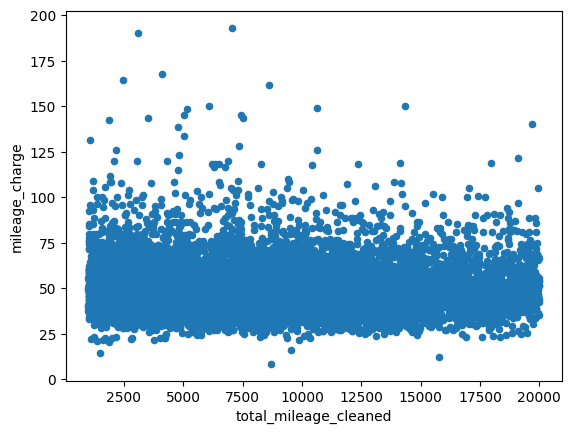

In [ ]:
df_reg.plot(kind='scatter', x='total_mileage_cleaned', y='mileage_charge')
plt.show()

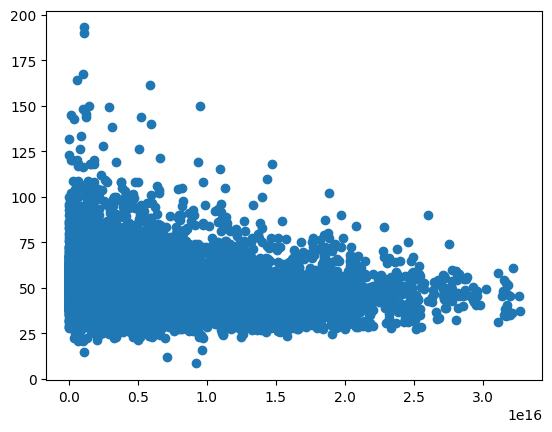

In [ ]:
plt.scatter(df_reg['bettery_current_age'].view('int64'), df_reg['mileage_charge'])

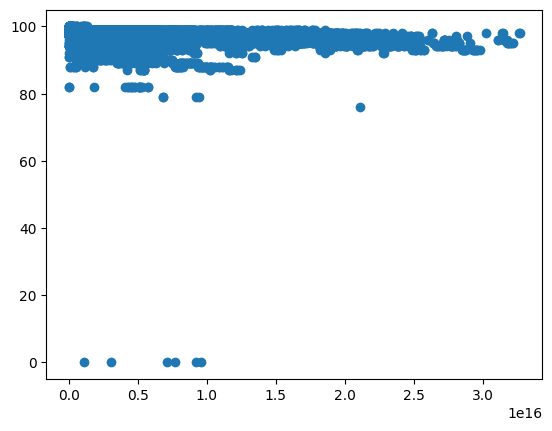

In [ ]:
plt.scatter(df_reg['bettery_current_age'].view('int64'), df_reg['battery_state_battery_soh'])

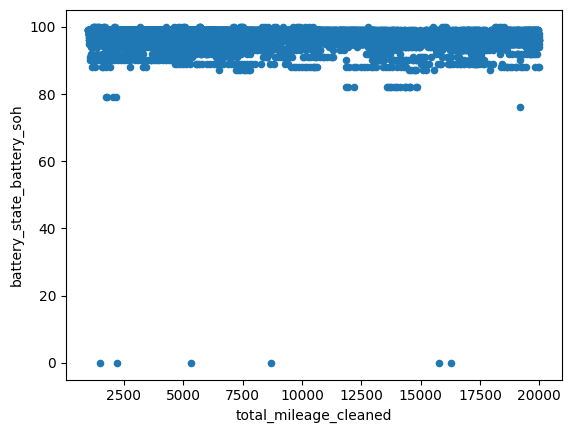

In [ ]:
df_reg.plot(kind='scatter', x='total_mileage_cleaned', y='battery_state_battery_soh')
plt.show()

In [ ]:
df_reg.columns

Index(['vehicle_id', 'user_id', 'total_mileage', 'versions_mc_firmware',
       'occurred_at_time', 'app_version', 'assist_level', 'battery_cells',
       'battery_error_state', 'battery_serial_number',
       'battery_state_battery_soc', 'battery_state_battery_soh',
       'battery_state_cell_temp_1', 'battery_state_cell_temp_2',
       'battery_state_chg_temp', 'battery_state_dsg_temp',
       'battery_state_full_capacity', 'battery_state_pack_voltage',
       'battery_state_pre_start_temp', 'battery_state_real_time_current',
       'battery_state_remaining_capacity', 'dance_area', 'event',
       'hmi_serial_number', 'os_name', 'remaining_mileage',
       'versions_battery_firmware', 'versions_hmi_firmware',
       'versions_hmi_hardware', 'ValueCount', 'DateDifference_x',
       'battery_serial_number_clean', 'count_unique_battery',
       'count_unique_bike', 'DateDifference_y', 'more_than2', 'max_date',
       'total_mileage_cleaned', 'diff_mileage', 'diff_date', 'diff_soc',
    

In [ ]:
df_reg['dance_area'].unique()

array(['PARIS', 'BERLIN', 'HAMBURG', 'VIENNA', 'MUNICH', 'UNALLOCATED'],
      dtype=object)

<ipython-input-216-02f277afd7a9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['Color'] = df_reg['dance_area'].map(color_dict)


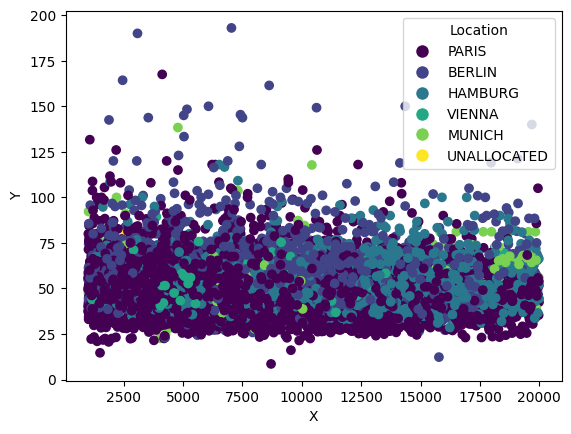

In [ ]:
# Create a scatter plot with dynamically assigned colors
unique_locations = df_reg['dance_area'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_locations)))

color_dict = {loc: color for loc, color in zip(unique_locations, colors)}
df_reg['Color'] = df_reg['dance_area'].map(color_dict)

plt.scatter(df_reg['total_mileage_cleaned'], df_reg['mileage_charge'], c=df_reg['Color'])

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=loc) for loc, color in color_dict.items()]
plt.legend(handles=handles, title='Location')

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(df_reg['total_mileage_cleaned'])

# Fit a linear regression model
model = sm.OLS(df_reg['mileage_charge'], X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         mileage_charge   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.897
Date:                Mon, 16 Oct 2023   Prob (F-statistic):             0.0888
Time:                        18:54:01   Log-Likelihood:                -47523.
No. Observations:               11873   AIC:                         9.505e+04
Df Residuals:                   11871   BIC:                         9.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    50.78

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(df_reg['bettery_current_age'].view('int64'))

# Fit a linear regression model
model = sm.OLS(df_reg['mileage_charge'], X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         mileage_charge   R-squared:                      -7.113
Model:                            OLS   Adj. R-squared:                 -7.113
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 16 Oct 2023   Prob (F-statistic):                nan
Time:                        18:54:18   Log-Likelihood:                -59952.
No. Observations:               11873   AIC:                         1.199e+05
Df Residuals:                   11872   BIC:                         1.199e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.722e-31   3

Regression Line Equation: Y = 62.25 + 0.00 * X


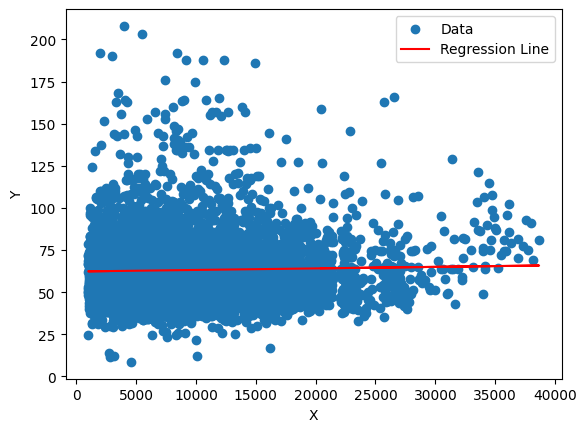

In [ ]:
intercept, slope = model.params

# Print the regression line equation
print(f'Regression Line Equation: Y = {intercept:.2f} + {slope:.2f} * X')

# Plot the data points and regression line
plt.scatter(df_reg['total_mileage_cleaned'], df_reg['mileage_charge'], label='Data')
plt.plot(df_reg['total_mileage_cleaned'], intercept + slope * df_reg['total_mileage_cleaned'], color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['vehicle_id', 'user_id', 'total_mileage', 'versions_mc_firmware',
       'occurred_at_time', 'app_version', 'assist_level', 'battery_cells',
       'battery_error_state', 'battery_serial_number',
       'battery_state_battery_soc', 'battery_state_battery_soh',
       'battery_state_cell_temp_1', 'battery_state_cell_temp_2',
       'battery_state_chg_temp', 'battery_state_dsg_temp',
       'battery_state_full_capacity', 'battery_state_pack_voltage',
       'battery_state_pre_start_temp', 'battery_state_real_time_current',
       'battery_state_remaining_capacity', 'dance_area', 'event',
       'hmi_serial_number', 'os_name', 'remaining_mileage',
       'versions_battery_firmware', 'versions_hmi_firmware',
       'versions_hmi_hardware', 'ValueCount'],
      dtype='object')

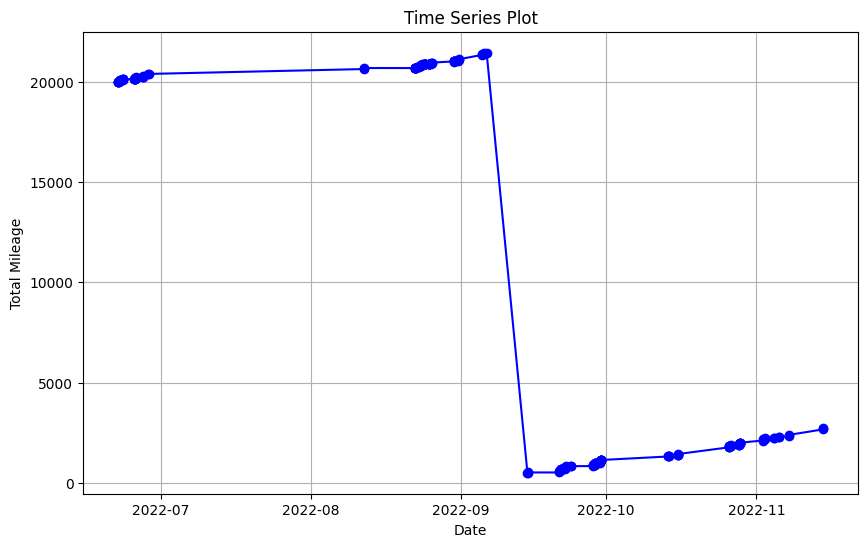

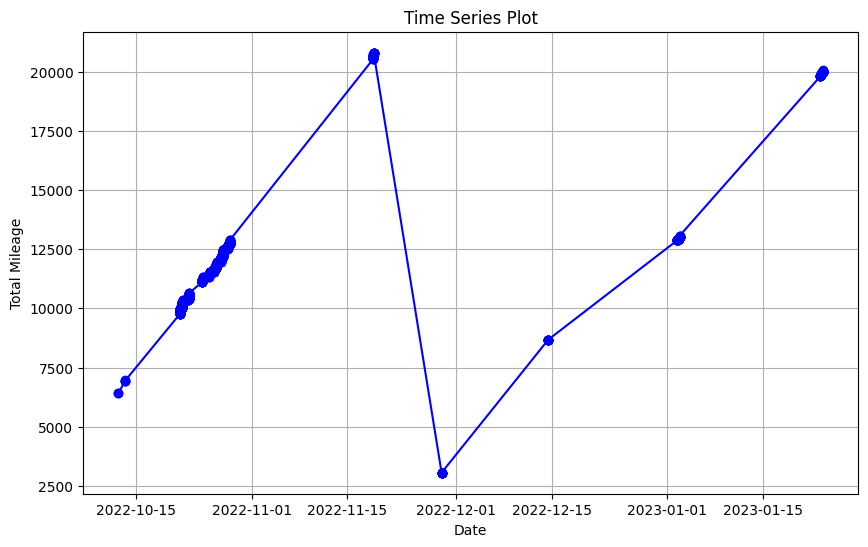

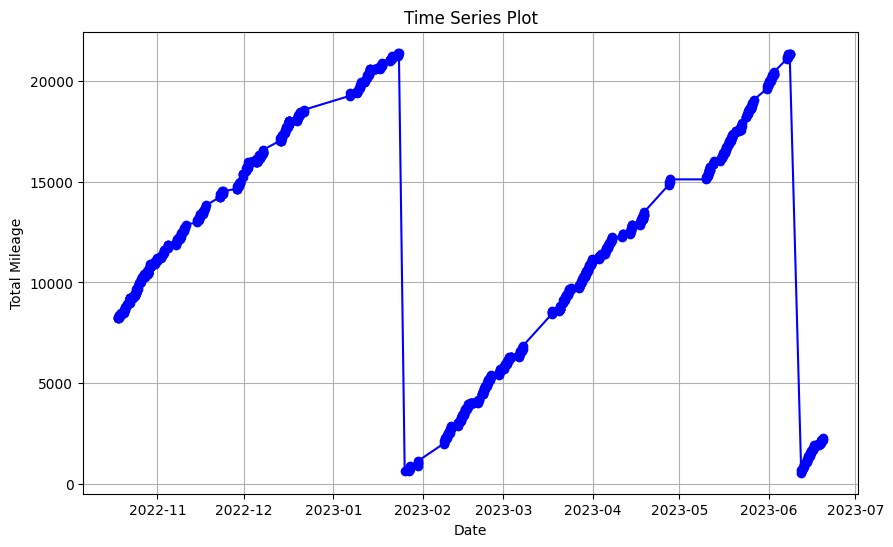

In [ ]:
for vehicle in ['HT1002MA121251821', 'HT1002MA121520208', 'HT1002MA122180005']:
  df_interim = df_unique[df_unique['battery_serial_number_clean'] == vehicle]

  # plot mileage vs time:a
  df_interim.set_index('occurred_at_time', inplace=True)
  plt.figure(figsize=(10, 6))
  plt.plot(df_interim.index, df_interim['total_mileage'], marker='o', linestyle='-', color='b')
  plt.title('Time Series Plot')
  plt.xlabel('Date')
  plt.ylabel('Total Mileage')
  plt.grid(True)
  plt.show()

<ipython-input-26-43776859b7cb>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', len(unique_group_types))
<ipython-input-26-43776859b7cb>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', len(unique_group_types))


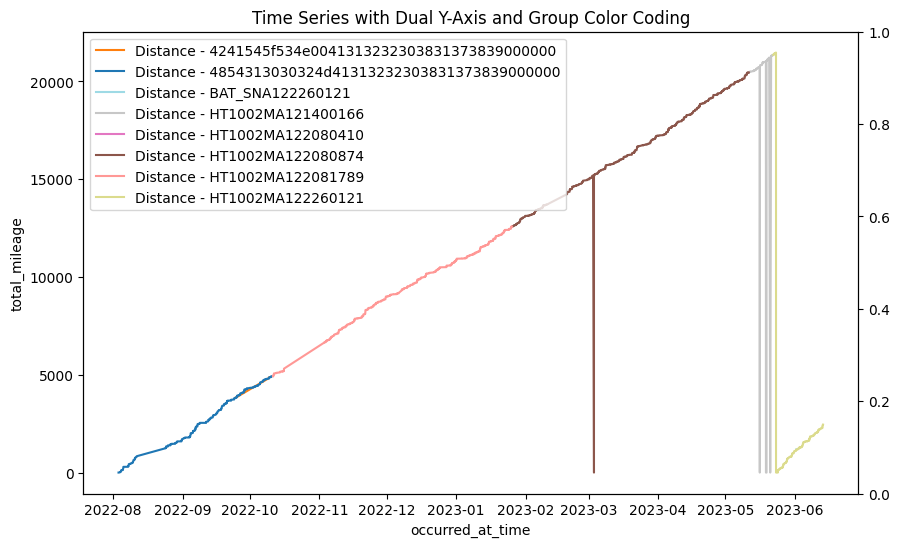

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Sample DataFrame
df = df[df['vehicle_id'] == '382d4727-6119-4391-adc0-ac5500c489b6']


# Create a figure and two subplots sharing the same x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Get unique values in the 'group_type' column
unique_group_types = df['battery_serial_number'].unique()

# Generate a color map based on the number of unique values
cmap = get_cmap('tab20', len(unique_group_types))

# Generate a color map based on the number of unique values
cmap = get_cmap('tab20', len(unique_group_types))

# Create a color mapping dictionary
color_map = {group_type: cmap(i) for i, group_type in enumerate(unique_group_types)}

for group_type, group_df in df.groupby('battery_serial_number'):
    ax1.plot(group_df['occurred_at_time'], group_df['total_mileage'], color=color_map[group_type], label=f'Distance - {group_type}')


ax1.set_xlabel('occurred_at_time')
ax1.set_ylabel('total_mileage')
ax1.tick_params(axis='y')

# Create a twin y-axis on the right side
ax2 = ax1.twinx()

# # Plot the 'money' data on the right y-axis (ax2) with color mapping
# for group_type, group_df in df.groupby('group_type'):
#     ax2.plot(group_df['date'], group_df['money'], color=color_map[group_type], label=f'Money - {group_type}')

# ax2.set_ylabel('Money')
# ax2.tick_params(axis='y')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines , labels, loc='upper left')

# Show the plot
plt.title('Time Series with Dual Y-Axis and Group Color Coding')
plt.show()


In [ ]:
df['battery_serial_number'].drop_duplicates()

833109     4854313030324d41313232303831373839000000
895774     4241545f534e0041313232303831373839000000
812517                                          NaN
1386119                           HT1002MA122081789
2387855                           HT1002MA122080874
1204978                           HT1002MA122080410
23627                             HT1002MA121400166
1534757                           HT1002MA122260121
670114                             BAT_SNA122260121
Name: battery_serial_number, dtype: object

**Plots for some examplary 🚴:**



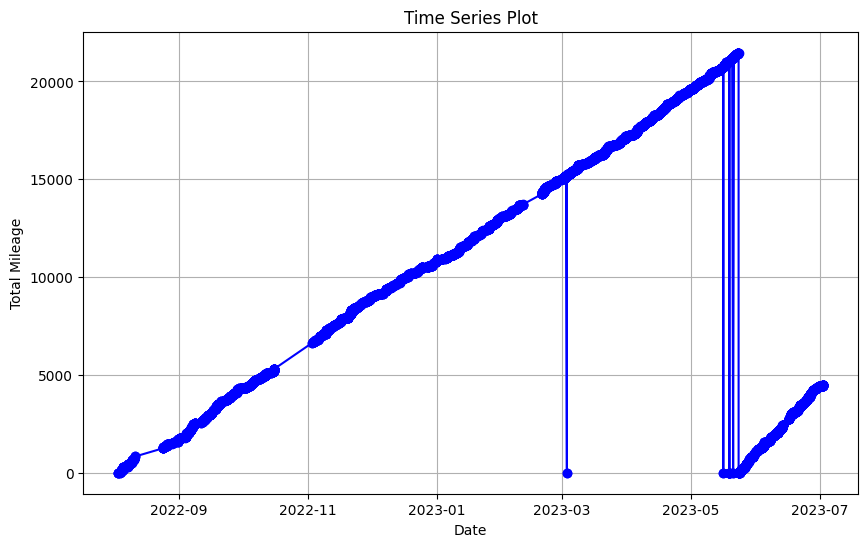

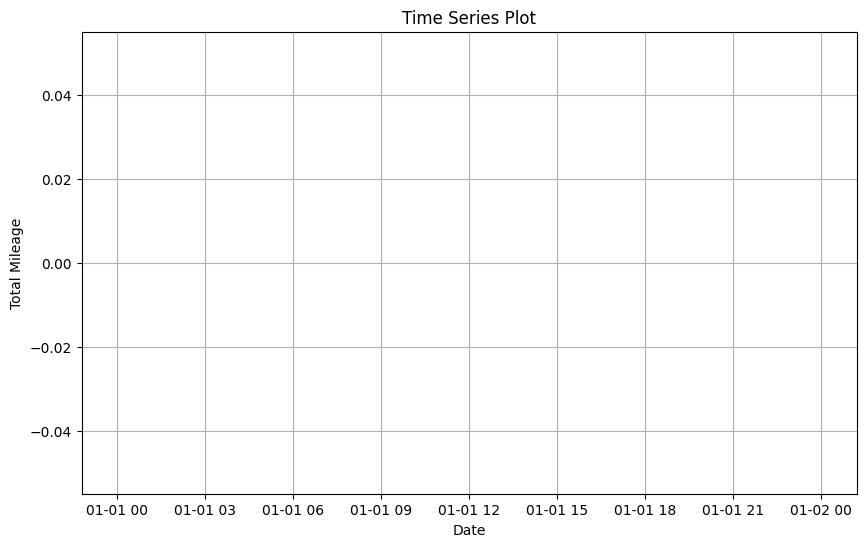

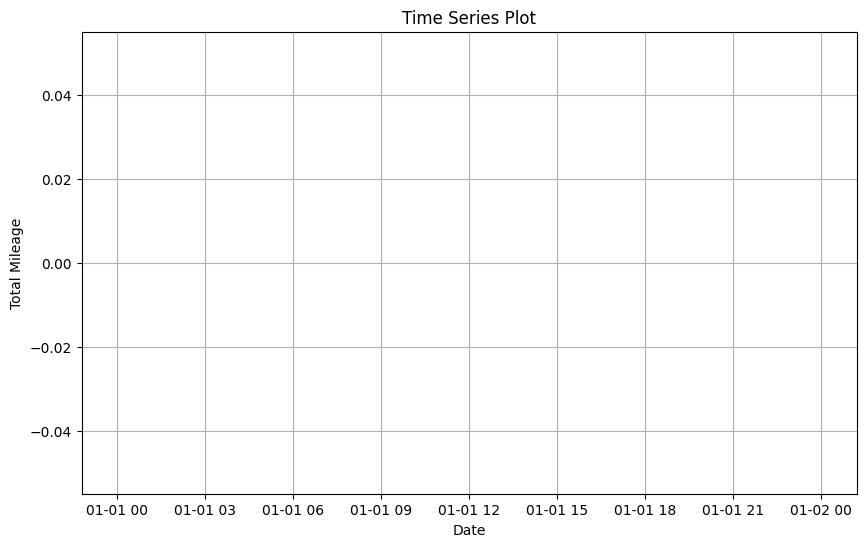

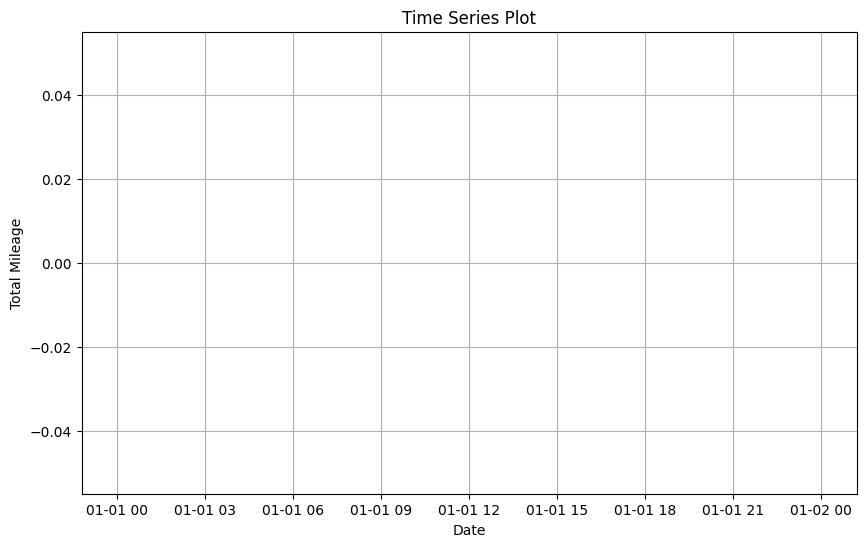

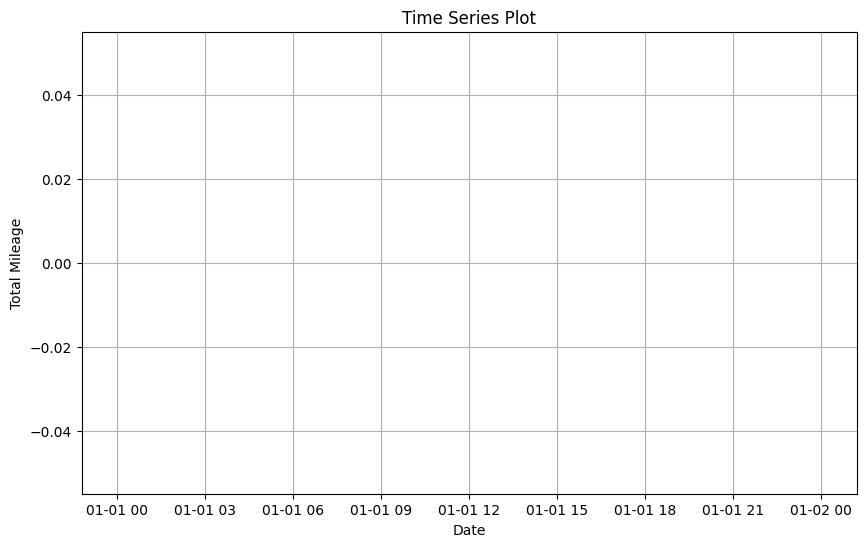

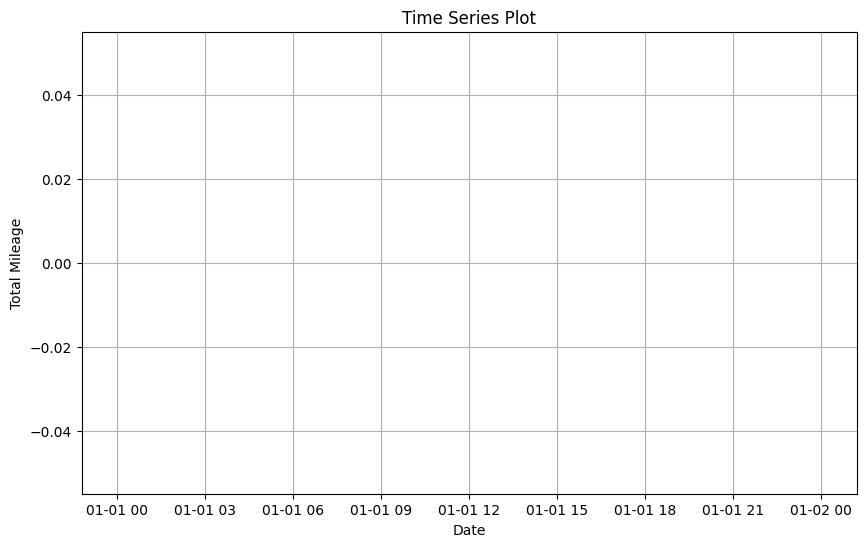

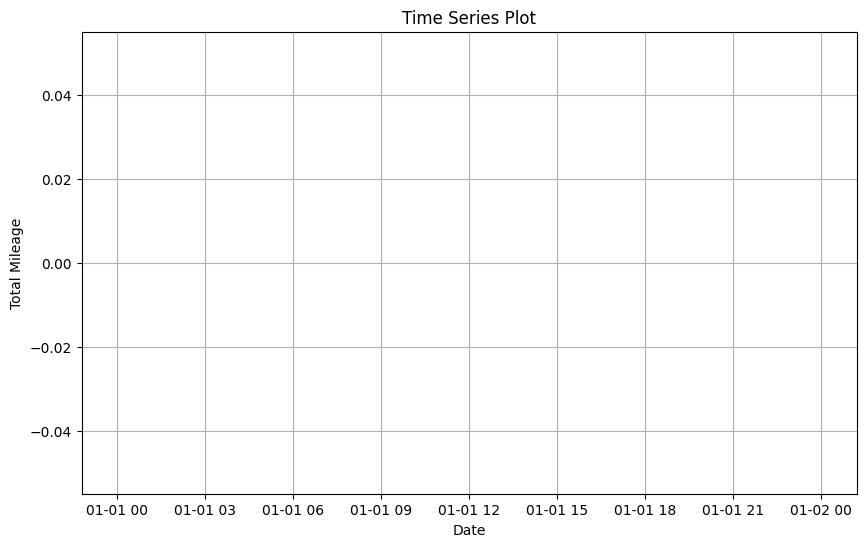

In [ ]:
# vehicles
vehicles = ['382d4727-6119-4391-adc0-ac5500c489b6',
            'bc3412f7-37a8-4676-8043-53f4a1bb316a',
            'ca4c5d0d-0d08-4189-b8ee-e8cd4d337422',
            '4cf2b02f-5631-4441-a93d-a1f2d59c83bf',
            '00e10c80-c79a-4e5e-b5ee-73de58bb7091',
            '010df9b5-ecea-445a-9cc5-01fa71edcce3',
            '00c8acbf-39fe-44dc-bdc5-257e189c4a58'
            ]

for vehicle in vehicles:
  df_interim = df[df['vehicle_id'] == vehicle]

  # plot mileage vs time:a
  df_interim.set_index('occurred_at_time', inplace=True)
  plt.figure(figsize=(10, 6))
  plt.plot(df_interim.index, df_interim['total_mileage'], marker='o', linestyle='-', color='b')
  plt.title('Time Series Plot')
  plt.xlabel('Date')
  plt.ylabel('Total Mileage')
  plt.grid(True)
  plt.show()

In [ ]:
df3[df3['battery_serial_number_clean'] =='HT1002MA122350163'].tail(50)

,vehicle_id,user_id,total_mileage,versions_mc_firmware,occurred_at_time,app_version,assist_level,battery_cells,battery_error_state,battery_serial_number,...,os_name,remaining_mileage,versions_battery_firmware,versions_hmi_firmware,versions_hmi_hardware,ValueCount,DateDifference,battery_serial_number_clean,count_unique_battery,count_unique_bike
11641,f7bda436-2170-4da2-8a51-098706ee177d,e4b0c630-5e24-446f-8a9f-f85e7b7174e0,3084.0,DA210815.10,2023-01-09 07:54:13,2022.12.9,1.0,NaN,0.0,HT1002MA122350163,...,iOS,664.0,1.0.3.0,1.7.18.0,1.0,396,218,HT1002MA122350163,1,1.0
11642,f7bda436-2170-4da2-8a51-098706ee177d,e4b0c630-5e24-446f-8a9f-f85e7b7174e0,3109.0,DA210815.10,2023-01-09 08:08:02,2022.12.9,1.0,NaN,0.0,HT1002MA122350163,...,iOS,632.0,1.0.3.0,1.7.18.0,1.0,396,218,HT1002MA122350163,1,1.0
11643,f7bda436-2170-4da2-8a51-098706ee177d,e4b0c630-5e24-446f-8a9f-f85e7b7174e0,3084.0,DA210815.10,2023-01-09 17:54:08,2022.12.9,1.0,NaN,0.0,HT1002MA122350163,...,iOS,632.0,1.0.3.0,1.7.18.0,1.0,396,218,HT1002MA122350163,1,1.0
11644,f7bda436-2170-4da2-8a51-098706ee177d,e4b0c630-5e24-446f-8a9f-f85e7b7174e0,3086.0,DA210815.10,2023-01-09 18:00:06,2022.12.9,1.0,NaN,0.0,HT1002MA122350163,...,iOS,632.0,1.0.3.0,1.7.18.0,1.0,396,218,HT1002MA122350163,1,1.0
11645,f7bda436-2170-4da2-8a51-098706ee177d,e4b0c630-5e24-446f-8a9f-f85e7b7174e0,3086.0,DA210815.10,2023-01-09 18:00:12,2022.12.9,1.0,NaN,0.0,HT1002MA122350163,...,iOS,632.0,1.0.3.0,1.7.18.0,1.0,396,218,HT1002MA122350163,1,1.0
11646,f7bda436-2170-4da2-8a51-098706ee177d,e4b0c630-5e24-446f-8a9f-f85e7b7174e0,3086.0,DA210815.10,2023-01-09 18:00:16,2022.12.9,1.0,NaN,0.0,HT1002MA122350163,...,iOS,632.0,1.0.3.0,1.7.18.0,1.0,396,218,HT1002MA122350163,1,1.0
11647,f7bda436-2170-4da2-8a51-098706ee177d,e4b0c630-5e24-446f-8a9f-f85e7b7174e0,3086.0,NaN,2023-01-09 18:00:23,2022.12.9,1.0,NaN,0.0,HT1002MA122350163,...,iOS,632.0,NaN,NaN,NaN,396,218,HT1002MA122350163,1,1.0
11648,f7bda436-2170-4da2-8a51-098706ee177d,e4b0c630-5e24-446f-8a9f-f85e7b7174e0,3086.0,DA210815.10,2023-01-09 18:01:49,2022.12.9,1.0,NaN,0.0,HT1002MA122350163,...,iOS,632.0,1.0.3.0,1.7.18.0,1.0,396,218,HT1002MA122350163,1,1.0
11649,f7bda436-2170-4da2-8a51-098706ee177d,e4b0c630-5e24-446f-8a9f-f85e7b7174e0,3086.0,NaN,2023-01-09 18:02:01,2022.12.9,1.0,NaN,0.0,HT1002MA122350163,...,iOS,632.0,NaN,NaN,NaN,396,218,HT1002MA122350163,1,1.0
11650,f7bda436-2170-4da2-8a51-098706ee177d,e4b0c630-5e24-446f-8a9f-f85e7b7174e0,3086.0,DA210815.10,2023-01-09 18:03:52,2022.12.9,1.0,NaN,0.0,HT1002MA122350163,...,iOS,632.0,1.0.3.0,1.7.18.0,1.0,396,218,HT1002MA122350163,1,1.0


In [ ]:
# based on above observation, it seems that there is a reset after total mileage of around 22000 (2200 km)
# TODO: filter out everything above 30000 km to avoid massive outliers in mileage
# TODO: in the first two graphs you see some random outliers with 0, try to find a way to filter them out
# TODO: for our analysis, we should not have this reset to 0 after 2200 km, as it seems like there is e.g. a new battery.
#       Ideally, we find a way that the time series keeps increasing and the values are basically added up. E.g. for the first graph after June '23
#       the values should keep increasing and not restart from 0.
#       Keep in mind that those resets happen several times, so we should find a smart solution here.